<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass5/hpdp/HANY/feature_eng_tool1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5: Automated Feature Engineering Tools Assignment
| Name                                     | Matrix Number | Task |
| :---------------------------------------- | :-------------: | :-------------: |
| ALYA BALQISS BINTI AZAHAR   |  A21EC0158     | Tool 1 (Autofeat) |
| MUHAMMAD HARITH HAKIM BIN OTHMAN              | A21EC0205     | Tool 1 (Autofeat) |
| LIEW YVONNE            |A21EC0045      | Tool 2 (Featuretools) |
|NADIA SYAFIQAH BINTI ZULKIPLI  | A21EC0098      | Tool 2 (Featuretools) |

---





# 1. Introduction
In this task, the primary focus is on exploring the employing Exploratory Data Analysis (EDA) and automated feature engineering tool **Autofeat** for hourly climate data originating from Brazil.

Feature engineering plays a crucial role in enhancing the performance of machine learning models by either creating new features or refining existing ones. The dataset contains various meteorological indicators like temperature, humidity, wind speed, and precipitation, documented at regular intervals. The main goal is to derive meaningful features that effectively capture the complex dynamics inherent in Brazil's weather patterns using the tools mentioned.

This exploration involves integrating Autofeat, a feature engineering tool, to automate the selection and generation of impactful features, thereby optimizing machine learning models. Alongside Autofeat, integrating EDA provides a comprehensive overview of the data's structure, distributions, and interrelationships among variables. This deeper understanding of the dataset precedes the feature engineering process.

---



# 2. Loading Dataset

## Import Libraries

In [ ]:
from  google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"alyabalqiss","key":"499ea417c14b12ac079d5239325e8609"}'}

- **'google.colab import files'** - imports the necessary function to upload files in Colab.

- **'files.upload()'** - initiates a file upload dialog box, enabling users to choose and upload files directly into the Colab notebook.

After running the cell with the code above, it will prompt the user to upload files. Navigate to the intended file(s) for upload, select them, and click "Open".

The uploaded files will be stored in the uploaded dictionary, where the keys are the file names and the values are the file contents. Further process or  actions can be performed with these files as needed within the Colab notebook.

## Uploading Dataset using Kaggle API
 The process involves setting up Kaggle credentials on Google Colab to enable interaction with the Kaggle API for dataset downloads.  This process enables users to access datasets without the need to download them manually, particularly beneficial for handling large datasets.

In [ ]:
!pip install kaggle # 1. Install the Kaggle Package
!mkdir -p ~/.kaggle # 2. Create a Kaggle Directory
!cp kaggle.json ~/.kaggle/ #3. Upload the Kaggle API Token
!chmod 600 ~/.kaggle/kaggle.json #4. Set File Permission

**Download the dataset**

In [ ]:
!kaggle datasets download PROPPG-PPG/hourly-weather-surface-brazil-southeast-region

hourly-weather-surface-brazil-southeast-region.zip: Skipping, found more recently modified local copy (use --force to force download)


**Unzip the downloaded dataset**

In [ ]:
!unzip hourly-weather-surface-brazil-southeast-region.zip

Archive:  hourly-weather-surface-brazil-southeast-region.zip
replace central_west.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Import Pandas Libraries and Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('central_west.csv')

This code reads the CSV file named **central_west.csv** (assuming it is one of the files within the unzipped dataset) into a Pandas DataFrame named df.

### Data Summary
Display the first few rows of a DataFrame using **df.head()**. This is helpful for quickly examining the structure and content of the dataset. By default, it shows the first 5 rows of the DataFrame.

In [ ]:
df.head()

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),...,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,138998,2017-12-20,14:00,0.0,899.6,900.0,899.6,3391,26.5,17.7,...,39,9.6,3.9,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
1,138999,2017-12-20,15:00,0.0,899.2,899.6,899.2,3306,26.6,16.7,...,55,8.3,3.4,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
2,139000,2017-12-20,16:00,0.0,898.6,899.2,898.6,3167,27.3,15.8,...,62,8.3,3.6,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
3,139001,2017-12-20,17:00,0.0,897.7,898.6,897.7,3279,27.5,12.9,...,43,6.7,3.1,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0
4,139002,2017-12-20,18:00,0.0,897.0,897.7,897.0,2753,27.5,13.7,...,98,6.4,3.5,CO,DF,PARANOA (COOPA-DF),A047,-16.011111,-47.5575,1043.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11427120 entries, 0 to 11427119
Data columns (total 27 columns):
 #   Column                                                 Dtype  
---  ------                                                 -----  
 0   index                                                  int64  
 1   Data                                                   object 
 2   Hora                                                   object 
 3   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       float64
 4   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  float64
 5   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        float64
 6   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       float64
 7   RADIACAO GLOBAL (Kj/m²)                                int64  
 8   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           float64
 9   TEMPERATURA DO PONTO DE ORVALHO (°C)                   float64
 10  TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             float64
 

The **df.info()** function provides a concise summary of the DataFrame's information. It includes details such as the column names, data types, non-null counts, and memory usage. This function helps in understanding the dataset's structure, identifying missing values, and assessing the types of data stored in each column.

### Number of Rows and Columns
Display the total number of rows and columns to get insights on the data's structure.

In [ ]:
#Find the number of rows and columns
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 11427120
Number of columns: 27




---


# Data Preprocessing



## Renaming the Columns
Before proceeding with additional data preprocessing steps, it is seen that the dataset chosen **(Climate Weather Surface of Brazil - Hourly)** has several columns in the Portugese language.

It is necessary to translate the dataset from Portuguese to English based on the information available on Kaggle. This translation provides a more comprehensive understanding of the dataset's contents.

In [ ]:
# Mapping the Portugese column names to their English equivalents
translation_dict = {
    'Data': 'Date',
    'Hora': 'Time',
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'Amount of Precipitation (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'Atmospheric Pressure at Station Level (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'MAX Air pressure for the last hour (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'MIN Air pressure for the last hour (mB)',
    'RADIACAO GLOBAL (Kj/m²)': 'Solar Radiation (KJ/m2)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)': 'Air Temperature (instant) (°C)',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)': 'Dew Point Temperature (instant) (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)': 'MAX Temperature for the last hour (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)': 'MIN Temperature for the last hour (°C)',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)': 'MAX Dew Point Temperature for the last hour (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)': 'MIN Dew Point Temperature for the last hour (°C)',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'MAX Relative Humid Temperature for the last hour (%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'MIN Relative Humid Temperature for the last hour (%)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)': 'Relative Humid (instant) (%)',
    'VENTO, DIREÇÃO HORARIA (gr) (° (gr))': 'Wind Direction (gr) (° (gr))',
    'VENTO, RAJADA MAXIMA (m/s)': 'Wind Gust (m/s)',
    'VENTO, VELOCIDADE HORARIA (m/s)': 'Wind Speed (m/s)'
}

# Renaming columns in the DataFrame
df.rename(columns=translation_dict, inplace=True)

To see the changes, display the dataset using df.columns().

In [ ]:
df.columns

Index(['index', 'Date', 'Time', 'Amount of Precipitation (mm)',
       'Atmospheric Pressure at Station Level (mB)',
       'MAX Air pressure for the last hour (mB)',
       'MIN Air pressure for the last hour (mB)', 'Solar Radiation (KJ/m2)',
       'Air Temperature (instant) (°C)',
       'Dew Point Temperature (instant) (°C)',
       'MAX Temperature for the last hour (°C)',
       'MIN Temperature for the last hour (°C)',
       'MAX Dew Point Temperature for the last hour (°C)',
       'MIN Dew Point Temperature for the last hour (°C)',
       'MAX Relative Humid Temperature for the last hour (%)',
       'MIN Relative Humid Temperature for the last hour (%)',
       'Relative Humid (instant) (%)', 'Wind Direction (gr) (° (gr))',
       'Wind Gust (m/s)', 'Wind Speed (m/s)', 'region', 'state', 'station',
       'station_code', 'latitude', 'longitude', 'height'],
      dtype='object')

## Replacing Negative Values
Given that the dataset contains negative values of 9999 (-9999) within specific columns related to weather parameters, it's imperative to replace these negative values with zeros. This decision stems from the understanding that certain weather-related measurements, such as temperature, humidity, or atmospheric pressure, should not logically have such negative values within the context of this dataset.

In [ ]:
# Replace all occurrences of -9999 with 0 in the entire DataFrame
df.replace(-9999, 0, inplace=True)

- This code snippet replaces all instances of -9999 with 0 throughout the DataFrame, effectively transforming negative placeholder values to zeros.

- The negative values in these columns might signify missing data, erroneous entries, or placeholders that were inaccurately represented as negative values.

## Handling Missing Values

In [ ]:
#Handle missing values
df = df.dropna()

This step ensures that any rows containing NaN (missing) values across any column are removed from the DataFrame. It helps in cleaning the data by eliminating rows with incomplete information.

## Convert Data Types

In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Convert 'Hour' column to datetime format
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

# Display the updated data types of 'Date' and 'Hour' columns
print("Updated Data Types:")
print(df.dtypes)

Updated Data Types:
index                                                            int64
Date                                                    datetime64[ns]
Time                                                            object
Amount of Precipitation (mm)                                   float64
Atmospheric Pressure at Station Level (mB)                     float64
MAX Air pressure for the last hour (mB)                        float64
MIN Air pressure for the last hour (mB)                        float64
Solar Radiation (KJ/m2)                                          int64
Air Temperature (instant) (°C)                                 float64
Dew Point Temperature (instant) (°C)                           float64
MAX Temperature for the last hour (°C)                         float64
MIN Temperature for the last hour (°C)                         float64
MAX Dew Point Temperature for the last hour (°C)               float64
MIN Dew Point Temperature for the last hour (°C)         

- Converting 'Date' and 'Time' columns to datetime format ensures uniformity in data representation. It prevents inconsistencies that might arise from different formats or interpretations of dates and times.

- Datetime objects also allow for easy extraction of components like day, month, year, hour, minute, etc. This makes it simpler to perform time-based operations, filtering, grouping, and aggregating data based on temporal criteria.

---

# Performing Exploratory Data Analysis (EDA)

**1. Sum of all numeric columns**

In [ ]:
#Sum all numeric columns
sum = df.sum(numeric_only=True)
sum

index                                                   2.011775e+12
Amount of Precipitation (mm)                            1.488907e+06
Atmospheric Pressure at Station Level (mB)              9.434898e+09
MAX Air pressure for the last hour (mB)                 9.433359e+09
MIN Air pressure for the last hour (mB)                 9.426565e+09
Solar Radiation (KJ/m2)                                 8.294114e+09
Air Temperature (instant) (°C)                          2.404545e+08
Dew Point Temperature (instant) (°C)                    1.672062e+08
MAX Temperature for the last hour (°C)                  2.474457e+08
MIN Temperature for the last hour (°C)                  2.333363e+08
MAX Dew Point Temperature for the last hour (°C)        1.727853e+08
MIN Dew Point Temperature for the last hour (°C)        1.616953e+08
MAX Relative Humid Temperature for the last hour (%)    7.031402e+08
MIN Relative Humid Temperature for the last hour (%)    6.426778e+08
Relative Humid (instant) (%)      

**2. Mean of all numeric columns**

In [ ]:
#Mean of all numeric columns
mean = df.mean(numeric_only=True)
mean

index                                                   176052.691065
Amount of Precipitation (mm)                                 0.130296
Atmospheric Pressure at Station Level (mB)                 825.658446
MAX Air pressure for the last hour (mB)                    825.523753
MIN Air pressure for the last hour (mB)                    824.929211
Solar Radiation (KJ/m2)                                    725.827197
Air Temperature (instant) (°C)                              21.042438
Dew Point Temperature (instant) (°C)                        14.632399
MAX Temperature for the last hour (°C)                      21.654247
MIN Temperature for the last hour (°C)                      20.419520
MAX Dew Point Temperature for the last hour (°C)            15.120634
MIN Dew Point Temperature for the last hour (°C)            14.150132
MAX Relative Humid Temperature for the last hour (%)        61.532584
MIN Relative Humid Temperature for the last hour (%)        56.241449
Relative Humid (inst

**3. Minimum values of all numeric columns**

In [ ]:
#Minimum values of all numeric columns
min_values = df.min(numeric_only=True)
min_values

index                                                    0.000000
Amount of Precipitation (mm)                             0.000000
Atmospheric Pressure at Station Level (mB)               0.000000
MAX Air pressure for the last hour (mB)                  0.000000
MIN Air pressure for the last hour (mB)                  0.000000
Solar Radiation (KJ/m2)                                  0.000000
Air Temperature (instant) (°C)                          -9.800000
Dew Point Temperature (instant) (°C)                   -10.000000
MAX Temperature for the last hour (°C)                  -9.700000
MIN Temperature for the last hour (°C)                  -9.700000
MAX Dew Point Temperature for the last hour (°C)       -10.000000
MIN Dew Point Temperature for the last hour (°C)       -10.000000
MAX Relative Humid Temperature for the last hour (%)     0.000000
MIN Relative Humid Temperature for the last hour (%)     0.000000
Relative Humid (instant) (%)                             0.000000
Wind Direc

**4. Maximum values of all numeric columns**

In [ ]:
#Maximum values of all numeric columns
max_values = df.max(numeric_only=True)
max_values

index                                                   419935.000000
Amount of Precipitation (mm)                                96.000000
Atmospheric Pressure at Station Level (mB)                1028.800000
MAX Air pressure for the last hour (mB)                   1030.600000
MIN Air pressure for the last hour (mB)                   1028.100000
Solar Radiation (KJ/m2)                                  48898.000000
Air Temperature (instant) (°C)                              45.000000
Dew Point Temperature (instant) (°C)                        44.800000
MAX Temperature for the last hour (°C)                      45.000000
MIN Temperature for the last hour (°C)                      45.000000
MAX Dew Point Temperature for the last hour (°C)            44.900000
MIN Dew Point Temperature for the last hour (°C)            44.700000
MAX Relative Humid Temperature for the last hour (%)       100.000000
MIN Relative Humid Temperature for the last hour (%)       100.000000
Relative Humid (inst

**5. Median of all numeric columns**

In [ ]:
#Median of all numeric columns
median_values = df.median(numeric_only=True)
median_values

index                                                   166159.000000
Amount of Precipitation (mm)                                 0.000000
Atmospheric Pressure at Station Level (mB)                 955.300000
MAX Air pressure for the last hour (mB)                    955.500000
MIN Air pressure for the last hour (mB)                    954.900000
Solar Radiation (KJ/m2)                                      0.000000
Air Temperature (instant) (°C)                              22.900000
Dew Point Temperature (instant) (°C)                        17.300000
MAX Temperature for the last hour (°C)                      23.500000
MIN Temperature for the last hour (°C)                      22.400000
MAX Dew Point Temperature for the last hour (°C)            17.900000
MIN Dew Point Temperature for the last hour (°C)            16.800000
MAX Relative Humid Temperature for the last hour (%)        71.000000
MIN Relative Humid Temperature for the last hour (%)        62.000000
Relative Humid (inst

**6. First quantile (25th percentile) of all numeric columns**

In [ ]:
#First quantile of all numeric values
q1 = df.quantile(0.25, numeric_only=True)
q1

index                                                   79103.000000
Amount of Precipitation (mm)                                0.000000
Atmospheric Pressure at Station Level (mB)                923.300000
MAX Air pressure for the last hour (mB)                   923.400000
MIN Air pressure for the last hour (mB)                   922.800000
Solar Radiation (KJ/m2)                                     0.000000
Air Temperature (instant) (°C)                             19.200000
Dew Point Temperature (instant) (°C)                       10.600000
MAX Temperature for the last hour (°C)                     19.700000
MIN Temperature for the last hour (°C)                     18.600000
MAX Dew Point Temperature for the last hour (°C)           11.300000
MIN Dew Point Temperature for the last hour (°C)           10.000000
MAX Relative Humid Temperature for the last hour (%)       44.000000
MIN Relative Humid Temperature for the last hour (%)       36.000000
Relative Humid (instant) (%)      

**7. Third quantile (75th percentile) of all numeric columns**

In [ ]:
#Third quantile of all numeric values
q3 = df.quantile(0.75, numeric_only=True)
q3

index                                                   265705.000000
Amount of Precipitation (mm)                                 0.000000
Atmospheric Pressure at Station Level (mB)                 974.100000
MAX Air pressure for the last hour (mB)                    974.400000
MIN Air pressure for the last hour (mB)                    973.800000
Solar Radiation (KJ/m2)                                   1124.000000
Air Temperature (instant) (°C)                              26.900000
Dew Point Temperature (instant) (°C)                        20.500000
MAX Temperature for the last hour (°C)                      27.800000
MIN Temperature for the last hour (°C)                      26.000000
MAX Dew Point Temperature for the last hour (°C)            21.000000
MIN Dew Point Temperature for the last hour (°C)            20.000000
MAX Relative Humid Temperature for the last hour (%)        88.000000
MIN Relative Humid Temperature for the last hour (%)        83.000000
Relative Humid (inst

## Visualisations

Import Matplotlib Library

In [ ]:
import matplotlib.pyplot as plt

This library is used for creating visualisations in Python

**1. Precipitation Variation Over Time**

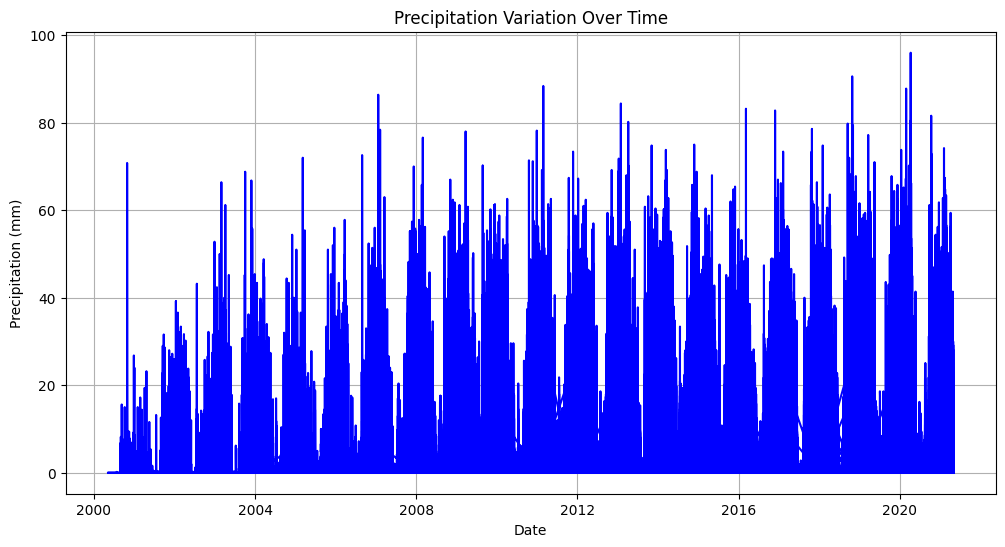

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Amount of Precipitation (mm)'], color='blue')
plt.title('Precipitation Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()

This generates a line plot illustrating the variation in precipitation over time using the 'Date' column on the x-axis and the 'Amount of Precipitation (mm)' column on the y-axis.

**2. Seasonal Variation in Temperature**

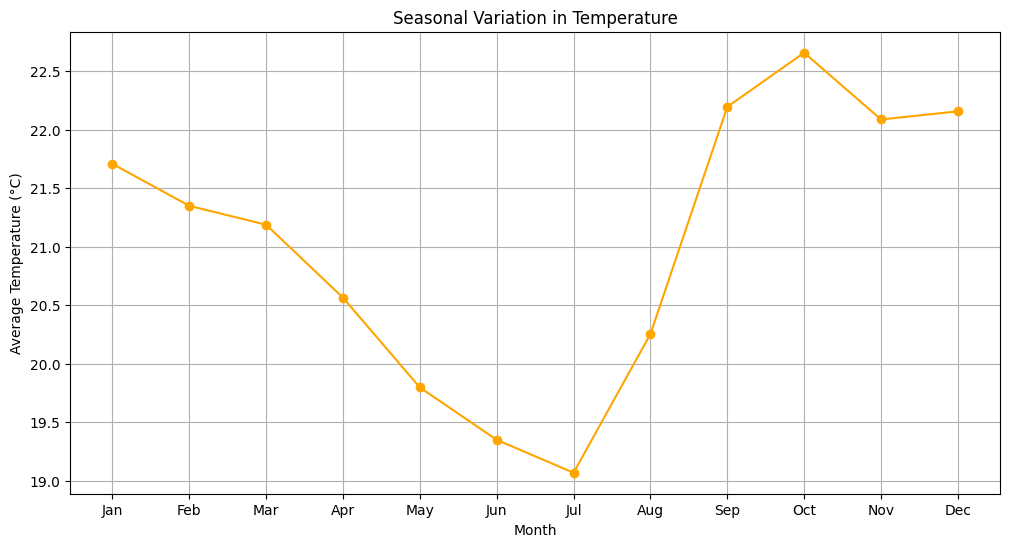

In [ ]:
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(12, 6))
plt.plot(df.groupby('Month')['Air Temperature (instant) (°C)'].mean(), marker='o', linestyle='-', color='orange')
plt.title('Seasonal Variation in Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


This calculates the average temperature per month and plots it to visualize the seasonal variation in temperature.

**3. Relationship Between Temperature and Solar Radiation (Scatterplot)**

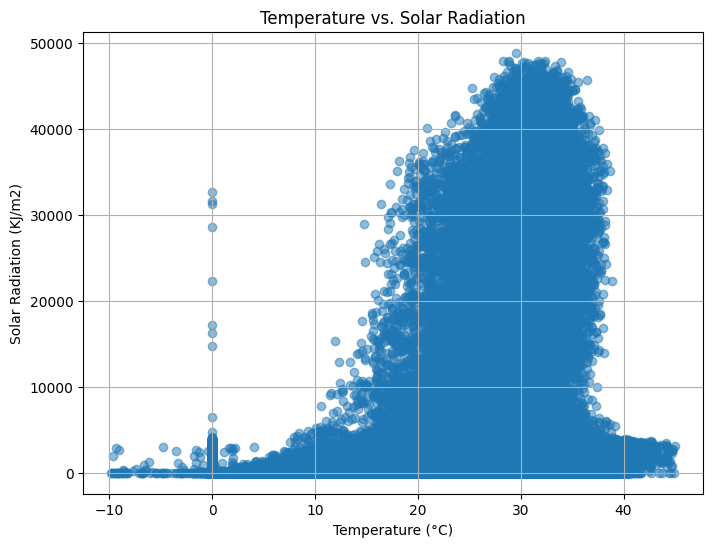

In [ ]:
# Scatter plot to visualize relationship between temperature and solar radiation
plt.figure(figsize=(8, 6))
plt.scatter(df['Air Temperature (instant) (°C)'], df['Solar Radiation (KJ/m2)'], alpha=0.5)
plt.title('Temperature vs. Solar Radiation')
plt.xlabel('Temperature (°C)')
plt.ylabel('Solar Radiation (KJ/m2)')
plt.grid(True)
plt.show()

This generates a scatter plot to explore the relationship between temperature and solar radiation.

**4. Humidity Variation Across Stations Using Plotly Express**

Import Plotly Express Library

In [ ]:
import plotly.express as px

This library provides a high-level interface for creating interactive visualizations in Python.

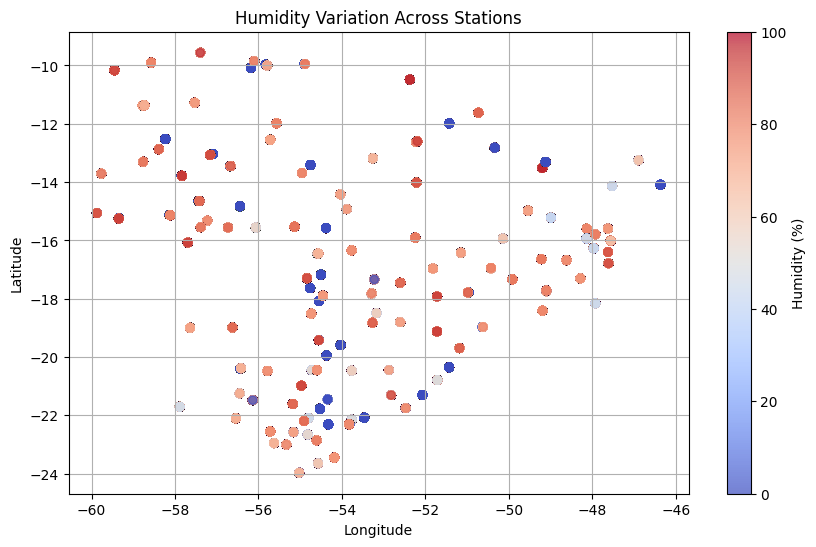

In [ ]:
#Exploring the relative humidity variations across states
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['Relative Humid (instant) (%)'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Humidity (%)')
plt.title('Humidity Variation Across Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


This creates a scatter plot to visualize humidity variations across different stations based on latitude and longitude.

**5. Atmospheric Pressure Across States**

<ipython-input-27-8503701bab68>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_pressure_by_state = df.groupby('state').mean().reset_index()


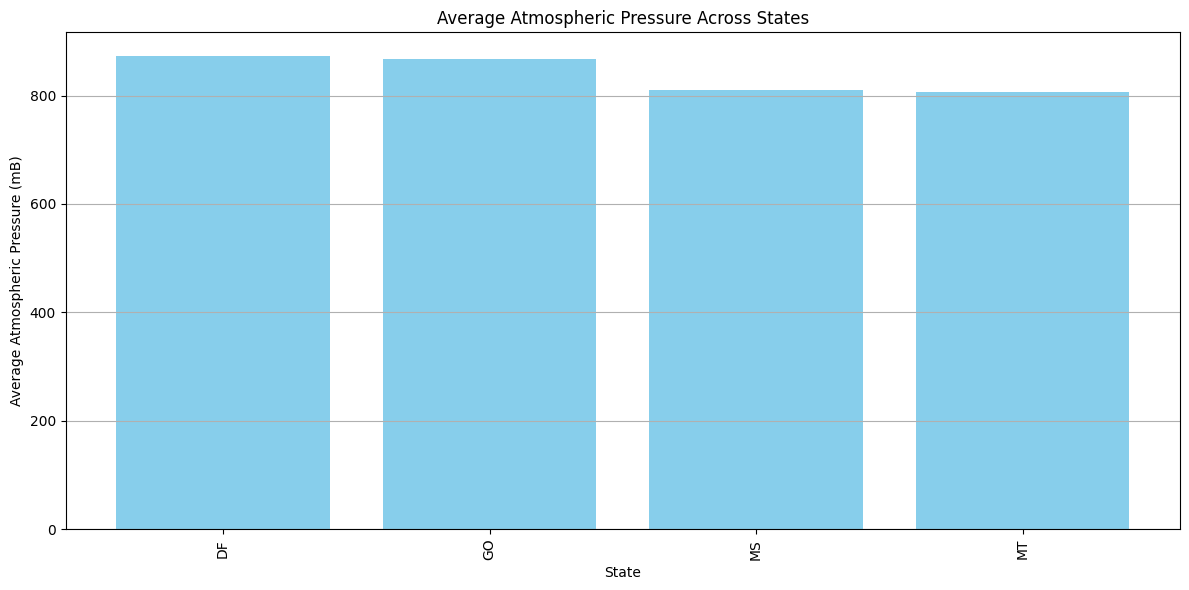

In [ ]:
# Group by states and calculate the mean values for atmospheric pressure
avg_pressure_by_state = df.groupby('state').mean().reset_index()

# Plotting atmospheric pressure variations across states
plt.figure(figsize=(12, 6))
plt.bar(avg_pressure_by_state['state'], avg_pressure_by_state['Atmospheric Pressure at Station Level (mB)'], color='skyblue')
plt.title('Average Atmospheric Pressure Across States')
plt.xlabel('State')
plt.ylabel('Average Atmospheric Pressure (mB)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

This calculates the mean atmospheric pressure for each state and presents it in a bar chart to visualize the average atmospheric pressure differences across states.

---

# Automated Feature Engineering Tool (Autofeat)



*   This task will utilize **'Autofeat'** as an Automated Feature Engineering Tool.AutoFeat is a python library that provides automated feature engineering and feature selection along with models such as AutoFeatRegressor and AutoFeatClassifier.

## 1. **Import libraries**


The !pip install autofeat command is used to install the autofeat Python library using the pip package manager.

So, when we !pip install autofeat, we are instructing the notebook to use the pip installer to download and install the autofeat library, making it available for use in our Python environment. This is a common way to install Python libraries when working in notebook environments like Jupyter or Google Colab.

In [ ]:
!pip install autofeat

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from autofeat import AutoFeatRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)

This code snippet includes several import statements and configurations that are commonly used in machine learning and data analysis tasks. Let's break down each part:

Importing Libraries:

* import pandas as pd: Imports the pandas library and aliases it as pd. Pandas is a powerful data manipulation and analysis library.
import numpy as np: Imports the NumPy library and aliases it as np. NumPy is used for numerical operations in Python.
Importing Specific Functions or Classes:

* from sklearn.preprocessing import LabelEncoder: Imports the LabelEncoder class from scikit-learn, which is used for encoding categorical variables.
from autofeat import AutoFeatRegressor: Imports the AutoFeatRegressor class from the autofeat library. AutoFeatRegressor is used for automatic feature engineering in regression tasks.
from sklearn.linear_model import LinearRegression: Imports the LinearRegression class from scikit-learn, which is used for linear regression.
from sklearn.ensemble import GradientBoostingClassifier: Imports the GradientBoostingClassifier class from scikit-learn, which is used for gradient boosting classification.
from sklearn.model_selection import train_test_split: Imports the train_test_split function from scikit-learn, which is used for splitting datasets into training and testing sets.
from sklearn.metrics import explained_variance_score: Imports the explained_variance_score function from scikit-learn, which is a metric for regression tasks.
Model Tuning with Hyperopt:

* from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval: Imports various functions and classes from the hyperopt library. hyperopt is used for hyperparameter optimization. This part of the code sets up the necessary components for tuning machine learning models using Bayesian optimization.
Ignoring Warnings:

* import warnings and warnings.filterwarnings("ignore"): Imports the warnings module and configures it to ignore warning messages. This is often used to suppress unnecessary warnings that may be generated during the execution of the code.
Pandas Display Configuration:

* pd.set_option('display.max_columns', 100): Sets the maximum number of displayed columns in pandas to 100. This is a display configuration to ensure that a large number of columns in a DataFrame can be viewed without truncation.

## 2. **Check Columns Available**
Check the columns available in the dataset for future references using **df.columns.**

In [ ]:
df.columns

Index(['index', 'Date', 'Time', 'Amount of Precipitation (mm)',
       'Atmospheric Pressure at Station Level (mB)',
       'MAX Air pressure for the last hour (mB)',
       'MIN Air pressure for the last hour (mB)', 'Solar Radiation (KJ/m2)',
       'Air Temperature (instant) (°C)',
       'Dew Point Temperature (instant) (°C)',
       'MAX Temperature for the last hour (°C)',
       'MIN Temperature for the last hour (°C)',
       'MAX Dew Point Temperature for the last hour (°C)',
       'MIN Dew Point Temperature for the last hour (°C)',
       'MAX Relative Humid Temperature for the last hour (%)',
       'MIN Relative Humid Temperature for the last hour (%)',
       'Relative Humid (instant) (%)', 'Wind Direction (gr) (° (gr))',
       'Wind Gust (m/s)', 'Wind Speed (m/s)', 'region', 'state', 'station',
       'station_code', 'latitude', 'longitude', 'height'],
      dtype='object')

## 3. **Perform Train and Test Set**


In [ ]:
X = df[['Amount of Precipitation (mm)']]
y = df[['MAX Temperature for the last hour (°C)']]

DataFrame Columns Selection:

* df[['Amount of Precipitation (mm)']]: Selects the column named 'Amount of Precipitation (mm)' from the DataFrame df. The double square brackets ([['...']]) are used to select a single column as a DataFrame, rather than a Series.

* df[['MAX Temperature for the last hour (°C)']]: Similar to the first line, this selects the column named 'MAX Temperature for the last hour (°C)'.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Variable Assignment:

* X = ...: Assigns the selected column 'Amount of Precipitation (mm)' to the variable X. The variable X is commonly used to represent the features or input variables in a machine learning model.

* y = ...: Assigns the selected column 'MAX Temperature for the last hour (°C)' to the variable y. The variable y is commonly used to represent the target variable or the variable we are trying to predict in a machine learning model.

Let's do the Feature Engineering!

In [ ]:
model = AutoFeatRegressor()
model

AutoFeatRegressor()

* The code us provided initializes an instance of the AutoFeatRegressor class and assigns it to the variable model. This code is used to create an automatic feature engineering model for regression tasks.

In [ ]:
X_train_feature_creation = model.fit_transform(X_train.to_numpy(), y_train.to_numpy().flatten())

* The code is using the fit_transform method of the AutoFeatRegressor model to perform automatic feature engineering on the training data (X_train) and the corresponding target variable (y_train).

In [ ]:
X_test_feature_creation = model.transform(X_test.to_numpy())


* This code line utilizes the AutoFeatRegressor model to transform the testing features (X_test) based on the feature engineering patterns learned during the model's training phase on the training data. The result, stored in the variable X_test_feature_creation, represents the testing feature matrix with consistent and aligned feature transformations, enabling accurate evaluation of the model's performance on new, unseen data.







## 4. **Results with Data Visualization**

In [ ]:
X_test_feature_creation.head()

,x000
0,997.9
1,964.4
2,0.0
3,981.1
4,956.2


from matplotlib import pyplot as plt
_df_0['x000'].plot(kind='hist', bins=20, title='x000')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['x000'].plot(kind='line', figsize=(8, 4), title='x000')
plt.gca().spines[['top', 'right']].set_visible(False)

### A) Values of the Dataset

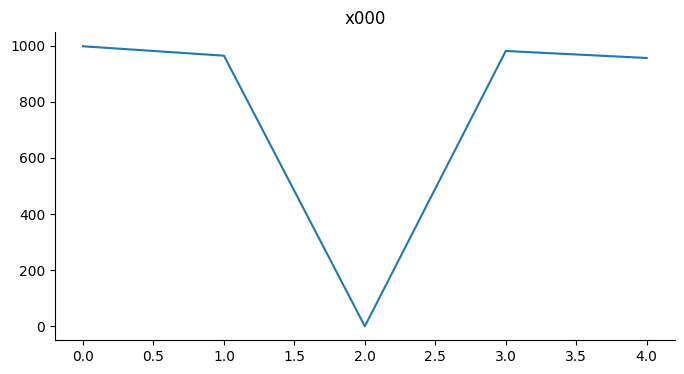

In [ ]:
from matplotlib import pyplot as plt
_df_1['x000'].plot(kind='line', figsize=(8, 4), title='x000')
plt.gca().spines[['top', 'right']].set_visible(False)

### B) Distribution of the Dataset

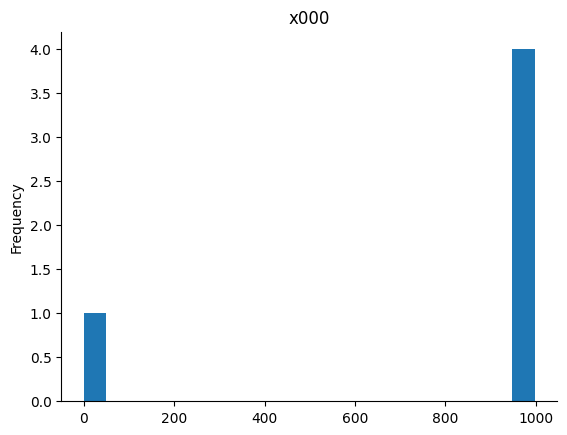

In [ ]:
from matplotlib import pyplot as plt
_df_0['x000'].plot(kind='hist', bins=20, title='x000')
plt.gca().spines[['top', 'right',]].set_visible(False)

---

# Conclusion



 In our thorough examination of the Brazilian weather dataset, our exploratory data analysis (EDA) uncovered several compelling insights that provide a nuanced understanding of the climate dynamics in the central-west region. One striking observation was the consistent rise in precipitation levels over the years, culminating in a peak during 2020, where recorded precipitation surpassed 80 mm. This trend signals potential shifts in rainfall patterns that could have significant implications for the local environment.

Another intriguing finding was the temperature trend, notably temperatures exceeding 22 degrees Celsius in the month of October. This rise in temperature appeared to be closely linked to increased solar radiation, suggesting a complex interplay between solar influences and atmospheric conditions. Understanding these relationships is crucial for predicting and adapting to potential climate changes.

Furthermore, our analysis identified the state of DF as having the highest atmospheric pressure among its counterparts. This observation implies a pivotal role for atmospheric pressure in governing the weather and climate in the central-west region of Brazil. The intricate balance of atmospheric elements underscores the complexity of the environmental factors at play.

To enhance the robustness of our analysis, we strategically employed AUTOFEAT, an advanced automated feature engineering tool. This tool not only facilitated the creation of a model but also enabled the training and testing of future data. By leveraging such automated tools, we aim to develop predictive models that can anticipate weather patterns, providing valuable insights for future climate scenarios in the region. This comprehensive approach, combining traditional analysis with advanced tools, strengthens our capacity to glean profound insights into the intricate dynamics of the Brazilian weather dataset.